In [1]:
%pylab inline
from matplotlib import style
style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import signal
from numpy import pi as PI

## Computing the power spectrum


To obtain the power spectrum of a signal, we must first define the **spectral resolution** or **frequency resolution**. 
It is the spacing between successive frequencies, and it is given by the ratio between the sampling rate and the total number of samples of the signal. 

<BR>
$$
\text{Spectral resolution} = \frac{\text{Sampling Rate}}{\text{Nsamples}}
$$
    
<BR>
Because the Welch method computes an estimate of the power spectrum by averaging the data into overlapping segments, 
it is important to define the length of the segment to obtain the appropiate spectral resolution.
<BR>
    
Finally, a filtering window is applied to avoid. A hamming window is generally applied.
    



In [3]:
%ls data

2019-06-06CM_ch25.npy  EEG.txt


## Sine wave 

A 30 seconds **sine** signal sampled at 100 Hz

Nysquid frequency is 50 Hz


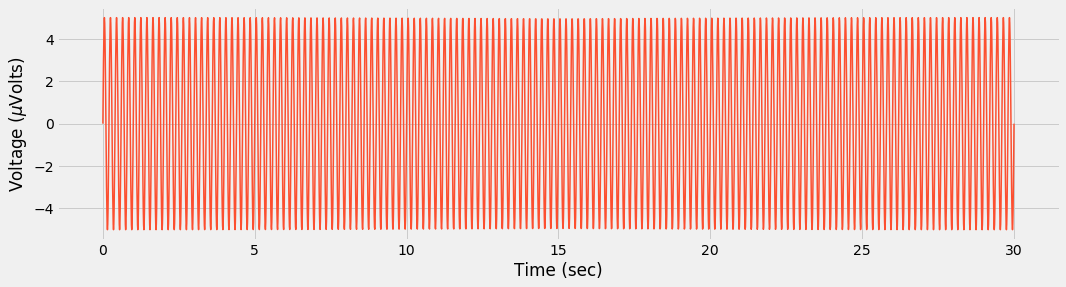

In [4]:
sr = 100
Nysquid = sr/2
print('Nysquid frequency is %d Hz'%Nysquid)
t = np.linspace(0,30,num=30*sr)
mysine = lambda f: np.sin(2*PI*f*t) 

sine = 5*mysine(5)
fig, ax = plt.subplots(figsize=(16,4))
plt.plot(t, sine, lw = 1.5, color='C1')
plt.xlabel('Time (sec)'), plt.ylabel('Voltage ($\mu$Volts)');


In [5]:
# Fourier transform
FourierCoeff = np.fft.fft(sine)/sine.size
DC = [np.abs(FourierCoeff[0])]
amp = np.concatenate((DC, 2*np.abs(FourierCoeff[1:])))  

# compute frequencies vector until half the sampling rate
Nsamples = int( math.floor(sine.size/2) )
hz = np.linspace(0, sr/2., num = Nsamples + 1 )
print('Spectral resolution = %2.4f Hz'%hz[1])

Spectral resolution = 0.0333 Hz


In [6]:
# Perform Welch's periodogram
segment = int( sr/0.25 ) 
myhann = signal.get_window('hann', segment)
myparams = dict(fs = sr, nperseg = segment, window = np.ones(segment), noverlap = 0, scaling = 'spectrum', return_onesided=True)
freq, ps = signal.welch(x = sine, **myparams)# units uV**2
print('Spectral resolution = %2.4f Hz'%freq[1])

Spectral resolution = 0.2500 Hz


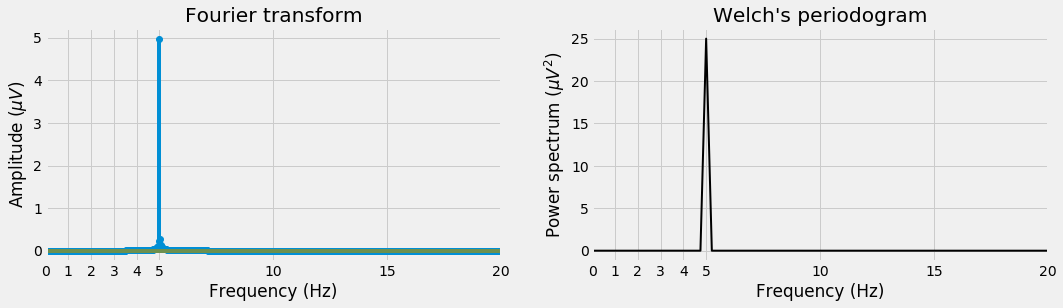

In [7]:
# Plot the power spectrum

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].set_title("Fourier transform")
ax[0].stem(hz,amp[:len(hz)], use_line_collection = True)
ax[0].set_ylabel('Amplitude ($\mu V$)')

ax[1].set_title("Welch's periodogram")
ax[1].plot(freq, 2*ps, color='k', lw=2) # multiply by 2 the amplitudes to have the negative frequencies
ax[1].set_ylabel('Power spectrum ($\mu V^2$)')

#ax[1].set_ylim([-1, pwr.max() * 1.1])
#ax[1].set_xlim([-1, freq.max()])

for myax in ax:
    myax.set_xlabel('Frequency (Hz)')
    myax.set_xlim(0,20)
    myticks = list(range(6)) + list(range(10, 25,5))
    myax.set_xticks(myticks)

In [8]:
2*ps.max(), np.sqrt(2*ps.max())

(24.98799123088821, 4.998798978843639)

<H2>EEG</H2>
<P> A 30 seconds voltage signal sampled at 100 Hz</P>

Nysquid frequency is 50 Hz


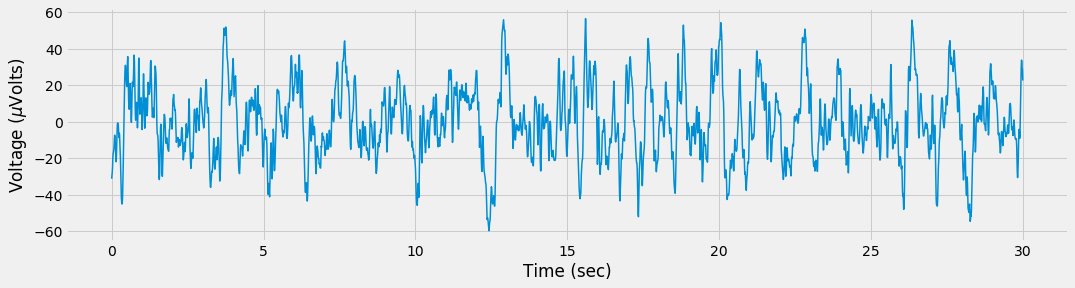

In [9]:
eeg = np.loadtxt('data/EEG.txt')
sr = 100 # samples per second
Nysquid = sr/2
print('Nysquid frequency is %d Hz'%Nysquid)
fig, ax = plt.subplots(figsize=(16,4))
plt.plot(np.arange(eeg.size)/sr, eeg, lw = 1.5)
plt.xlabel('Time (sec)'), plt.ylabel('Voltage ($\mu$Volts)');

In [10]:
# Fourier transform
FourierCoeff = np.fft.fft(eeg)/eeg.size
DC = [np.abs(FourierCoeff[0])]
amp = np.concatenate((DC, 2*np.abs(FourierCoeff[1:])))  

# compute frequencies vector until half the sampling rate
Nsamples = int( math.floor(eeg.size/2) )
hz = np.linspace(0, sr/2., num = Nsamples + 1 )
print('Spectral resolution = %2.4f Hz'%hz[1])

Spectral resolution = 0.0333 Hz


In [11]:
# Perform Welch's periodogram with standard parameters
segment = int( sr/0.25 ) 
myhann = signal.get_window('hann', segment)
myparams = dict(fs = sr, nperseg = segment, window = np.ones(segment), noverlap = 0, scaling = 'spectrum', return_onesided=True)
freq, ps = signal.welch(x = eeg, **myparams)# units uV**2
myparams2 = dict(fs = sr, nperseg = segment, window = myhann, noverlap = segment/5, scaling = 'spectrum', return_onesided=True)
freq2, ps2 = signal.welch(x = eeg, **myparams2)# units uV**2

print('Spectral resolution = %2.4f Hz'%freq[1])

Spectral resolution = 0.2500 Hz


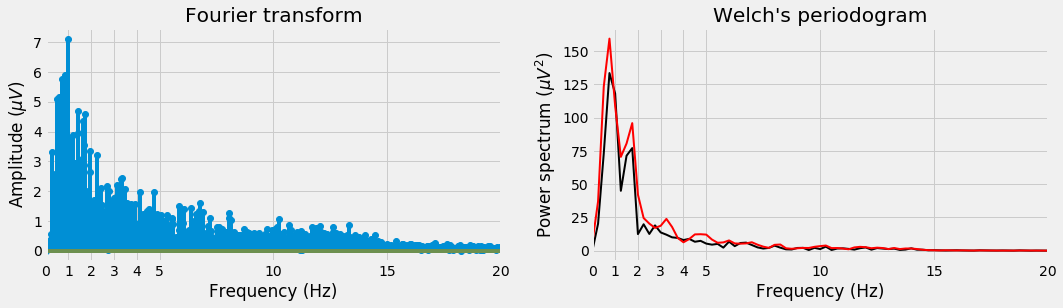

In [12]:
# Plot the power spectrum

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].set_title("Fourier transform")
ax[0].stem(hz,amp[:len(hz)], use_line_collection = True)
ax[0].set_ylabel('Amplitude ($\mu V$)')

ax[1].set_title("Welch's periodogram")
ax[1].plot(freq, 2*ps, color='k', lw=2) # multiply by 2 the amplitudes to have the negative frequencies
ax[1].plot(freq2, 2*ps2, color='r', lw=2) # multiply by 2 the amplitudes to have the negative frequencies

ax[1].set_ylabel('Power spectrum ($\mu V^2$)')

for myax in ax:
    myax.set_xlabel('Frequency (Hz)')
    myax.set_xlim(0,20)
    myticks = list(range(6)) + list(range(10, 25,5))
    myax.set_xticks(myticks)

In [13]:
# The Welch periodogram overstimate the amplitude of the signal!
2*ps.max(), np.sqrt(2*ps.max())

(133.49588822136826, 11.554042072857804)

<H2>LFP</H2>
<P> A 300 seconds voltage signal sampled at 30 kHz</P>

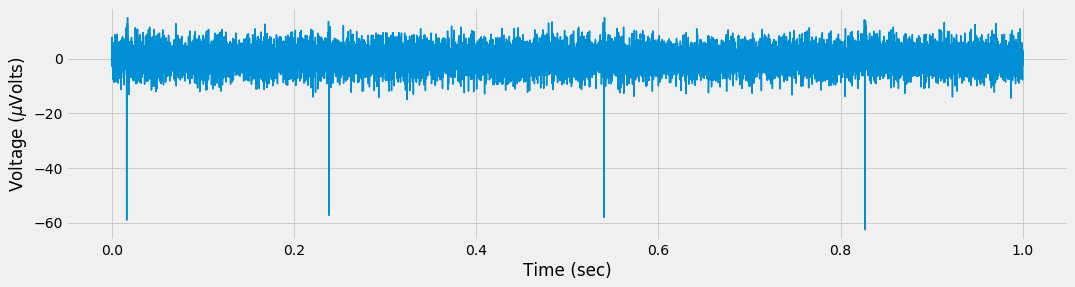

In [14]:
myrec = np.load('data/2019-06-06CM_ch25.npy')
sr = 30000 # samples per second
fig, ax = plt.subplots(figsize=(16,4))
plt.plot(np.arange(myrec.size)/sr, myrec, lw = 1.5)
plt.xlabel('Time (sec)'), plt.ylabel('Voltage ($\mu$Volts)');

In [15]:
# Fourier transform
FourierCoeff = np.fft.fft(myrec)/myrec.size
DC = [np.abs(FourierCoeff[0])]
amp = np.concatenate((DC, 2*np.abs(FourierCoeff[1:])))  

# compute frequencies vector until half the sampling rate
Nsamples = int( math.floor(myrec.size/2) )
hz = np.linspace(0, sr/2., num = Nsamples + 1 )
print('Spectral resolution = %2.4f Hz'%hz[1])

Spectral resolution = 1.0000 Hz


If you want to have a spectral resolution of 0.25 Hz, you need to sample at **least 4 seconds!**

In [16]:
# Perform Welch's periodogram with standard parameters
segment = int( sr) # we need at least 4 seconds here
myhann = signal.get_window('hann', segment)
myparams = dict(fs = sr, nperseg = segment, window = np.ones(segment), noverlap = 0, scaling = 'spectrum', return_onesided=True)
freq, ps = signal.welch(x = myrec, **myparams)# units uV**2
myparams2 = dict(fs = sr, nperseg = segment, window = myhann, noverlap = segment/5, scaling = 'spectrum', return_onesided=True)
freq2, ps2 = signal.welch(x = myrec, **myparams2)# units uV**2

print('Spectral resolution = %2.4f Hz'%freq[1])

Spectral resolution = 1.0000 Hz


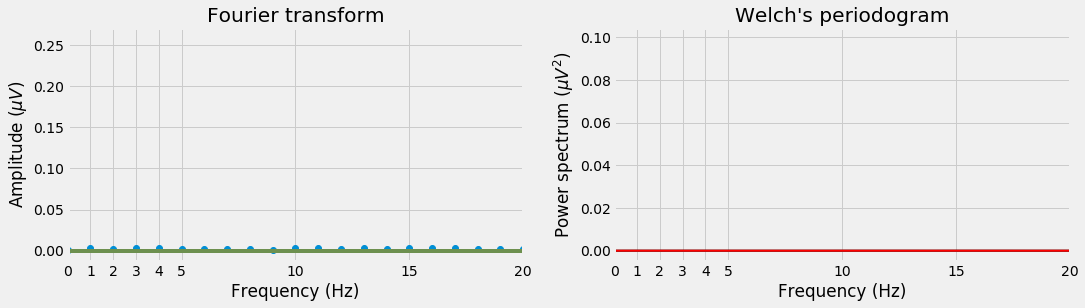

In [17]:
# Plot the power spectrum

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].set_title("Fourier transform")
ax[0].stem(hz,amp[:len(hz)], use_line_collection = True)
ax[0].set_ylabel('Amplitude ($\mu V$)')

ax[1].set_title("Welch's periodogram")
ax[1].plot(freq, 2*ps, color='k', lw=2) # multiply by 2 the amplitudes to have the negative frequencies
ax[1].plot(freq2, 2*ps2, color='r', lw=2) # multiply by 2 the amplitudes to have the negative frequencies

ax[1].set_ylabel('Power spectrum ($\mu V^2$)')

for myax in ax:
    myax.set_xlabel('Frequency (Hz)')
    myax.set_xlim(0,20)
    myticks = list(range(6)) + list(range(10, 25,5))
    myax.set_xticks(myticks)